Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



In [1]:
# importing libraries 
import numpy as np    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("glass.csv",names=["Id","Ri","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of Glass"])
df  

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#checking the top 5 columns of the dataset
df.head() 

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#checking the last columns of the dataset
df.tail() 

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
#checing some random columns of the dataset
df.sample(9) 

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
116,117,1.51829,13.24,3.90,1.41,72.33,0.55,8.31,0.00,0.10,2
96,97,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2
176,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00,6
32,33,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
89,90,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0.00,0.09,2
38,39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
194,195,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
152,153,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.00,0.00,3
182,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6


In [6]:
#looking for the name of columns present in the dataset
df.columns 

Index(['Id', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of Glass'],
      dtype='object')

In [7]:
#data types of objects present in the dataset
df.dtypes

Id                 int64
Ri               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

As we see in the above dataset id is the int64 type and other features of the dataset is float64

output or target value of the dataset is int64

The dtype of the entire dataset is object 

In [8]:
#information of dataset
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   Ri             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


As we see in the above dataset there is 214 rows and 11 columns

In the dataset there is 9 columns for float64 datatype and 2 columns for  int64 datatype which also include output or label coulmn

The total memory usage of the dataset in 18.5 kb


In [9]:
#checking in nun values present in the dataset
df.isnull().sum()     

Id               0
Ri               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In the above dataset there is no null values present in the dataset

In [10]:
#Dropping id column
df.drop('Id',axis=1, inplace=True)       

In [11]:
df

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In the above dataset after removing the id column now we have 10 columns and 214 rows

In [14]:
#Looking for unique value in the dataset
df["Type of Glass"].unique()     

array([1, 2, 3, 5, 6, 7], dtype=int64)

Value count:- 
 2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64


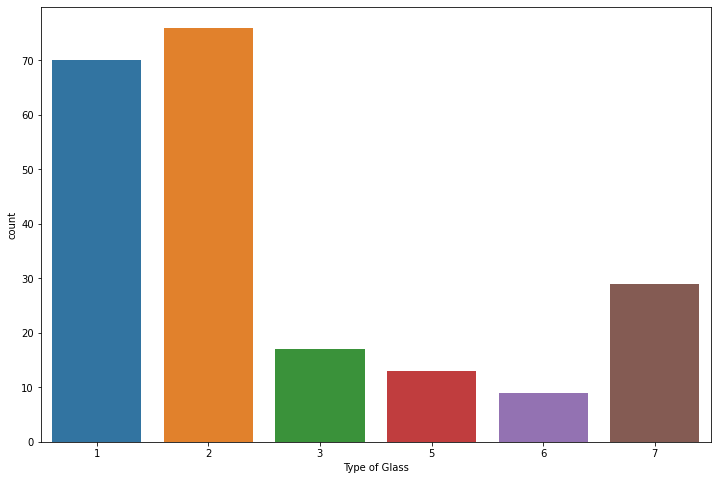

In [15]:
#Visualization
plt.figure(figsize=(12,8))
sns.countplot(df["Type of Glass"])
print('Value count:- \n',df["Type of Glass"].value_counts())

In [16]:
#checking number of unique values present in each column
df.nunique().to_frame("No of unique values ")   

,No of unique values
Ri,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type of Glass,6


<AxesSubplot:xlabel='Ri', ylabel='Density'>

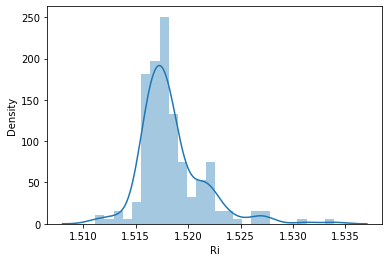

In [17]:
#Plotting
sns.distplot(df['Ri'])

<AxesSubplot:xlabel='Na', ylabel='Density'>

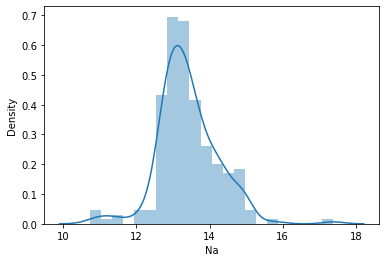

In [18]:
sns.distplot(df['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

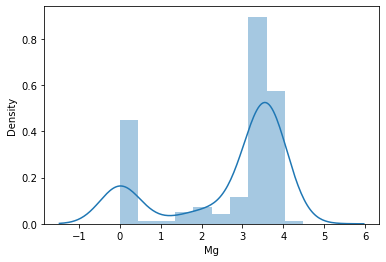

In [19]:
sns.distplot(df['Mg'])

<AxesSubplot:xlabel='Al', ylabel='Density'>

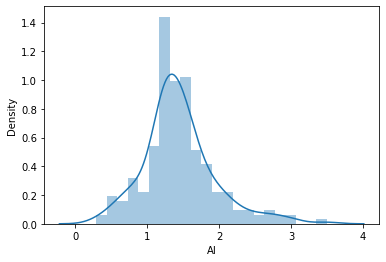

In [20]:
sns.distplot(df['Al'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

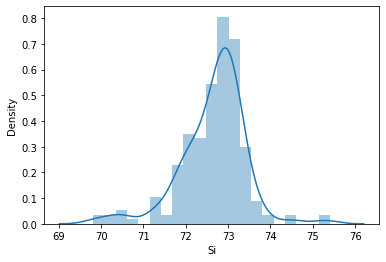

In [21]:
sns.distplot(df['Si'])


<AxesSubplot:xlabel='K', ylabel='Density'>

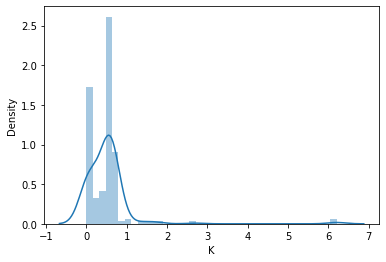

In [22]:
sns.distplot(df['K'])

<AxesSubplot:xlabel='K', ylabel='Density'>

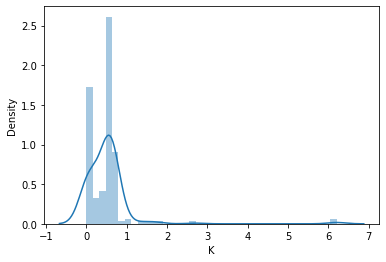

In [23]:
sns.distplot(df['K'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

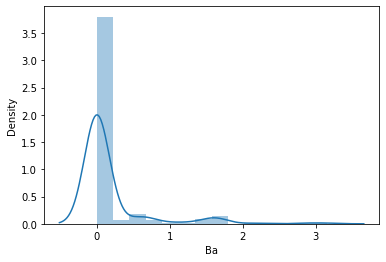

In [24]:
sns.distplot(df['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

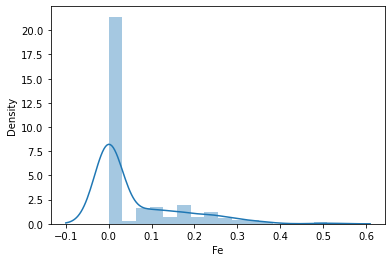

In [25]:
sns.distplot(df['Fe'])

As we see in the above plot data is highly skewed

<Figure size 576x864 with 0 Axes>

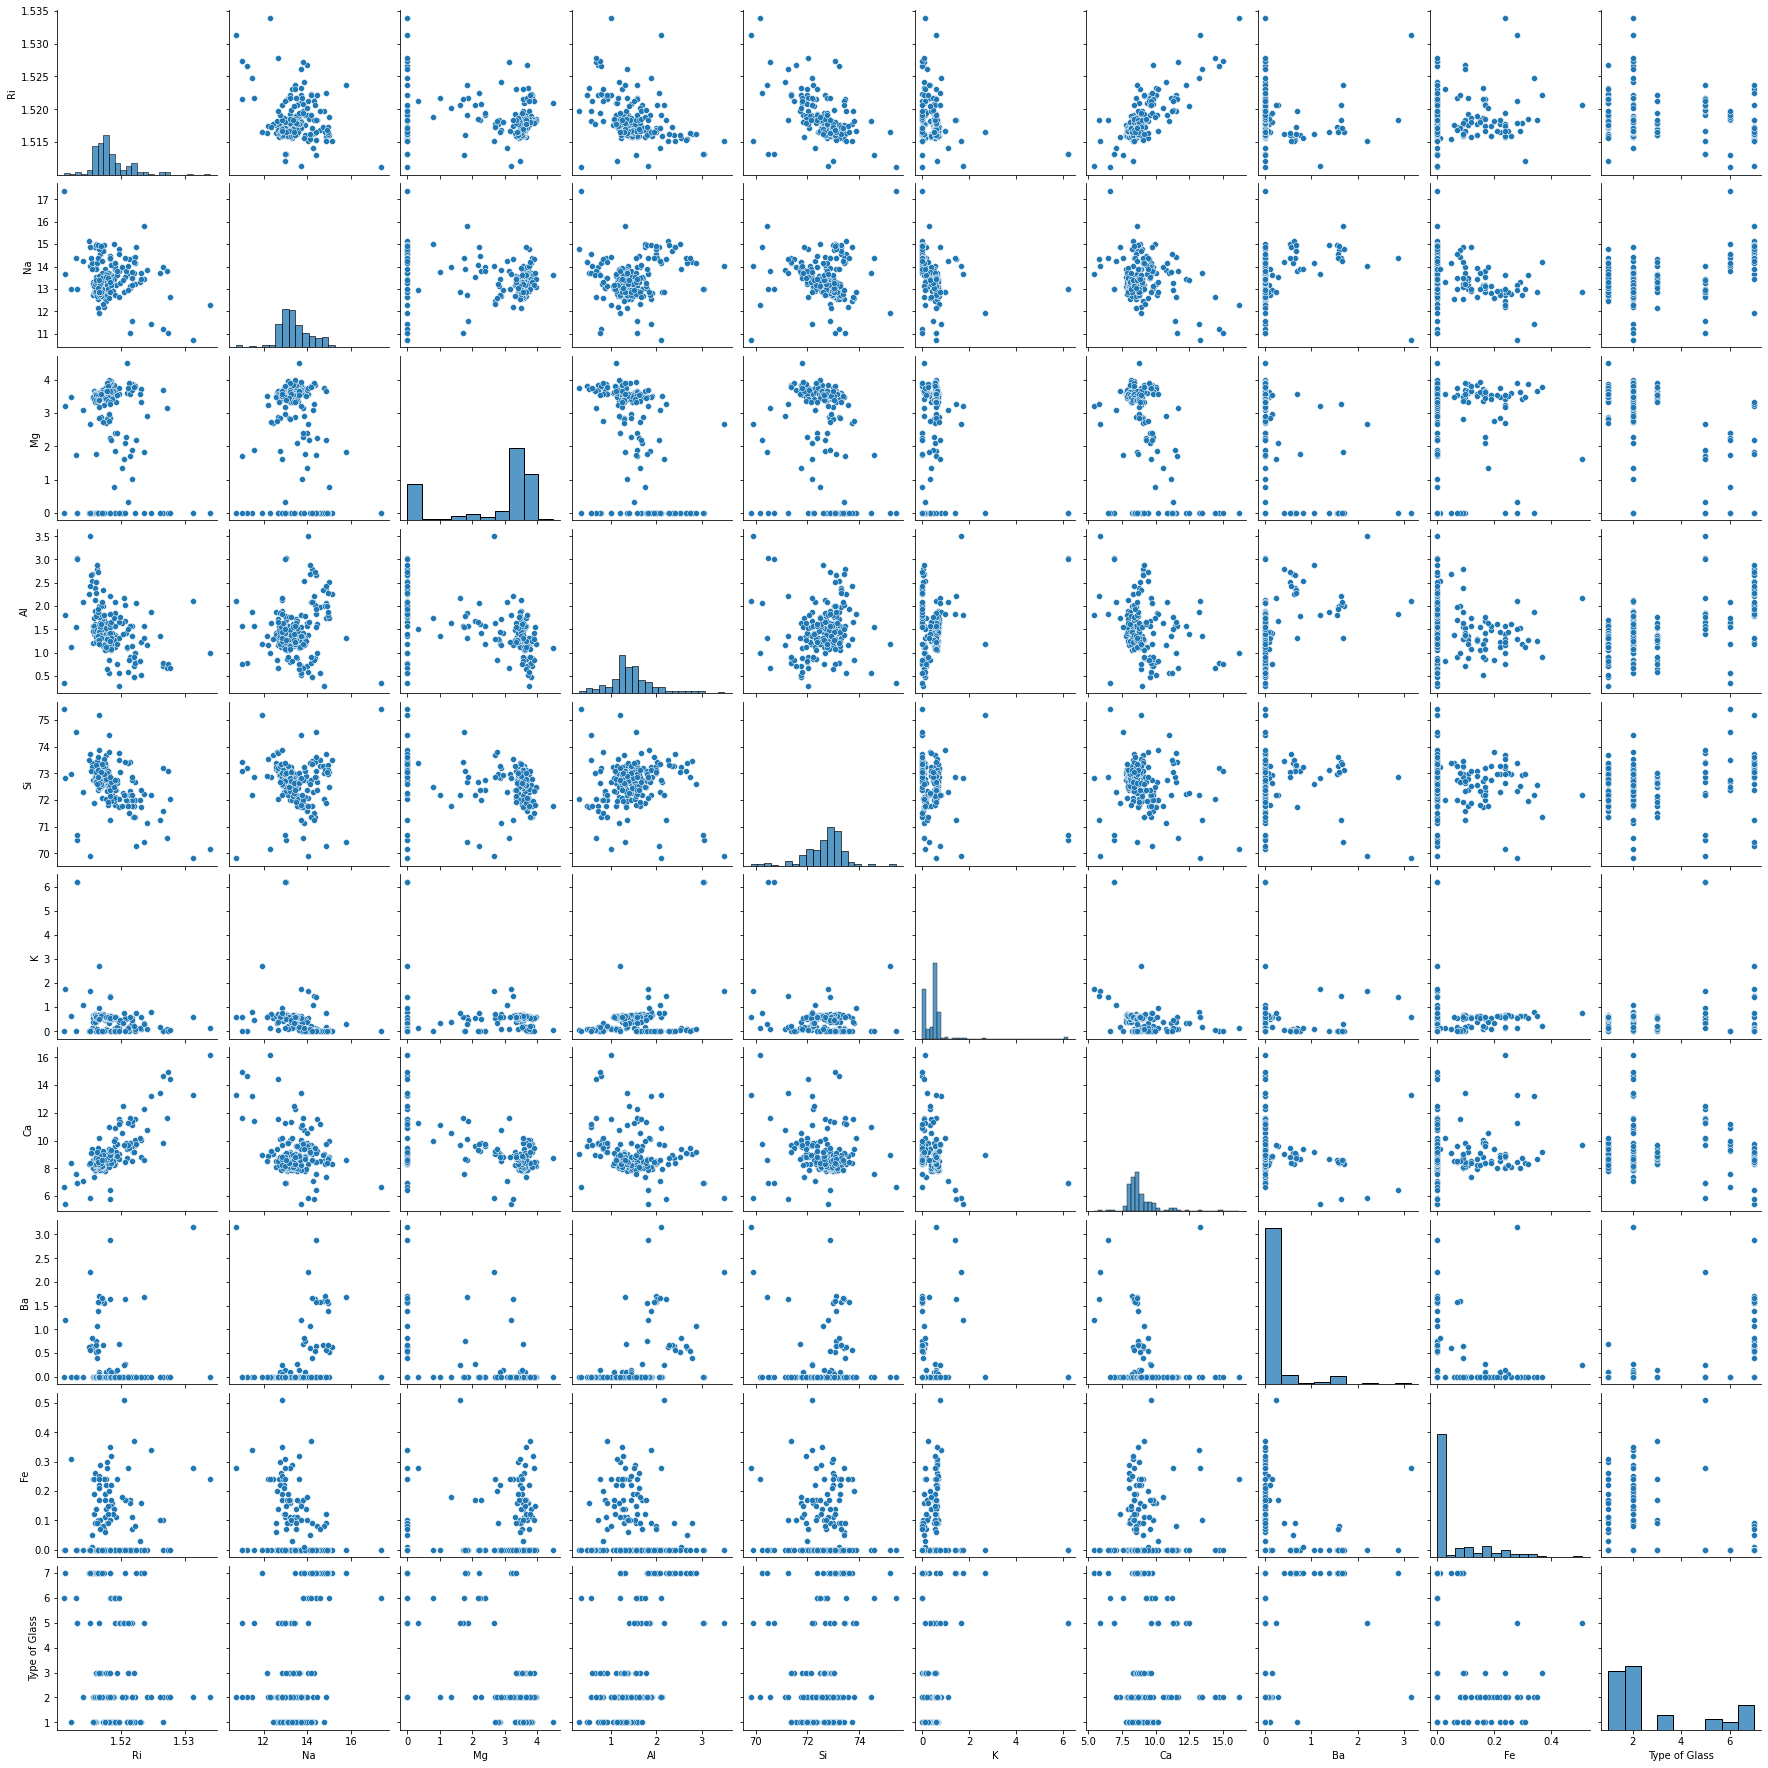

In [26]:
plt.figure(figsize=(8,12))
sns.pairplot(df)
plt.show()

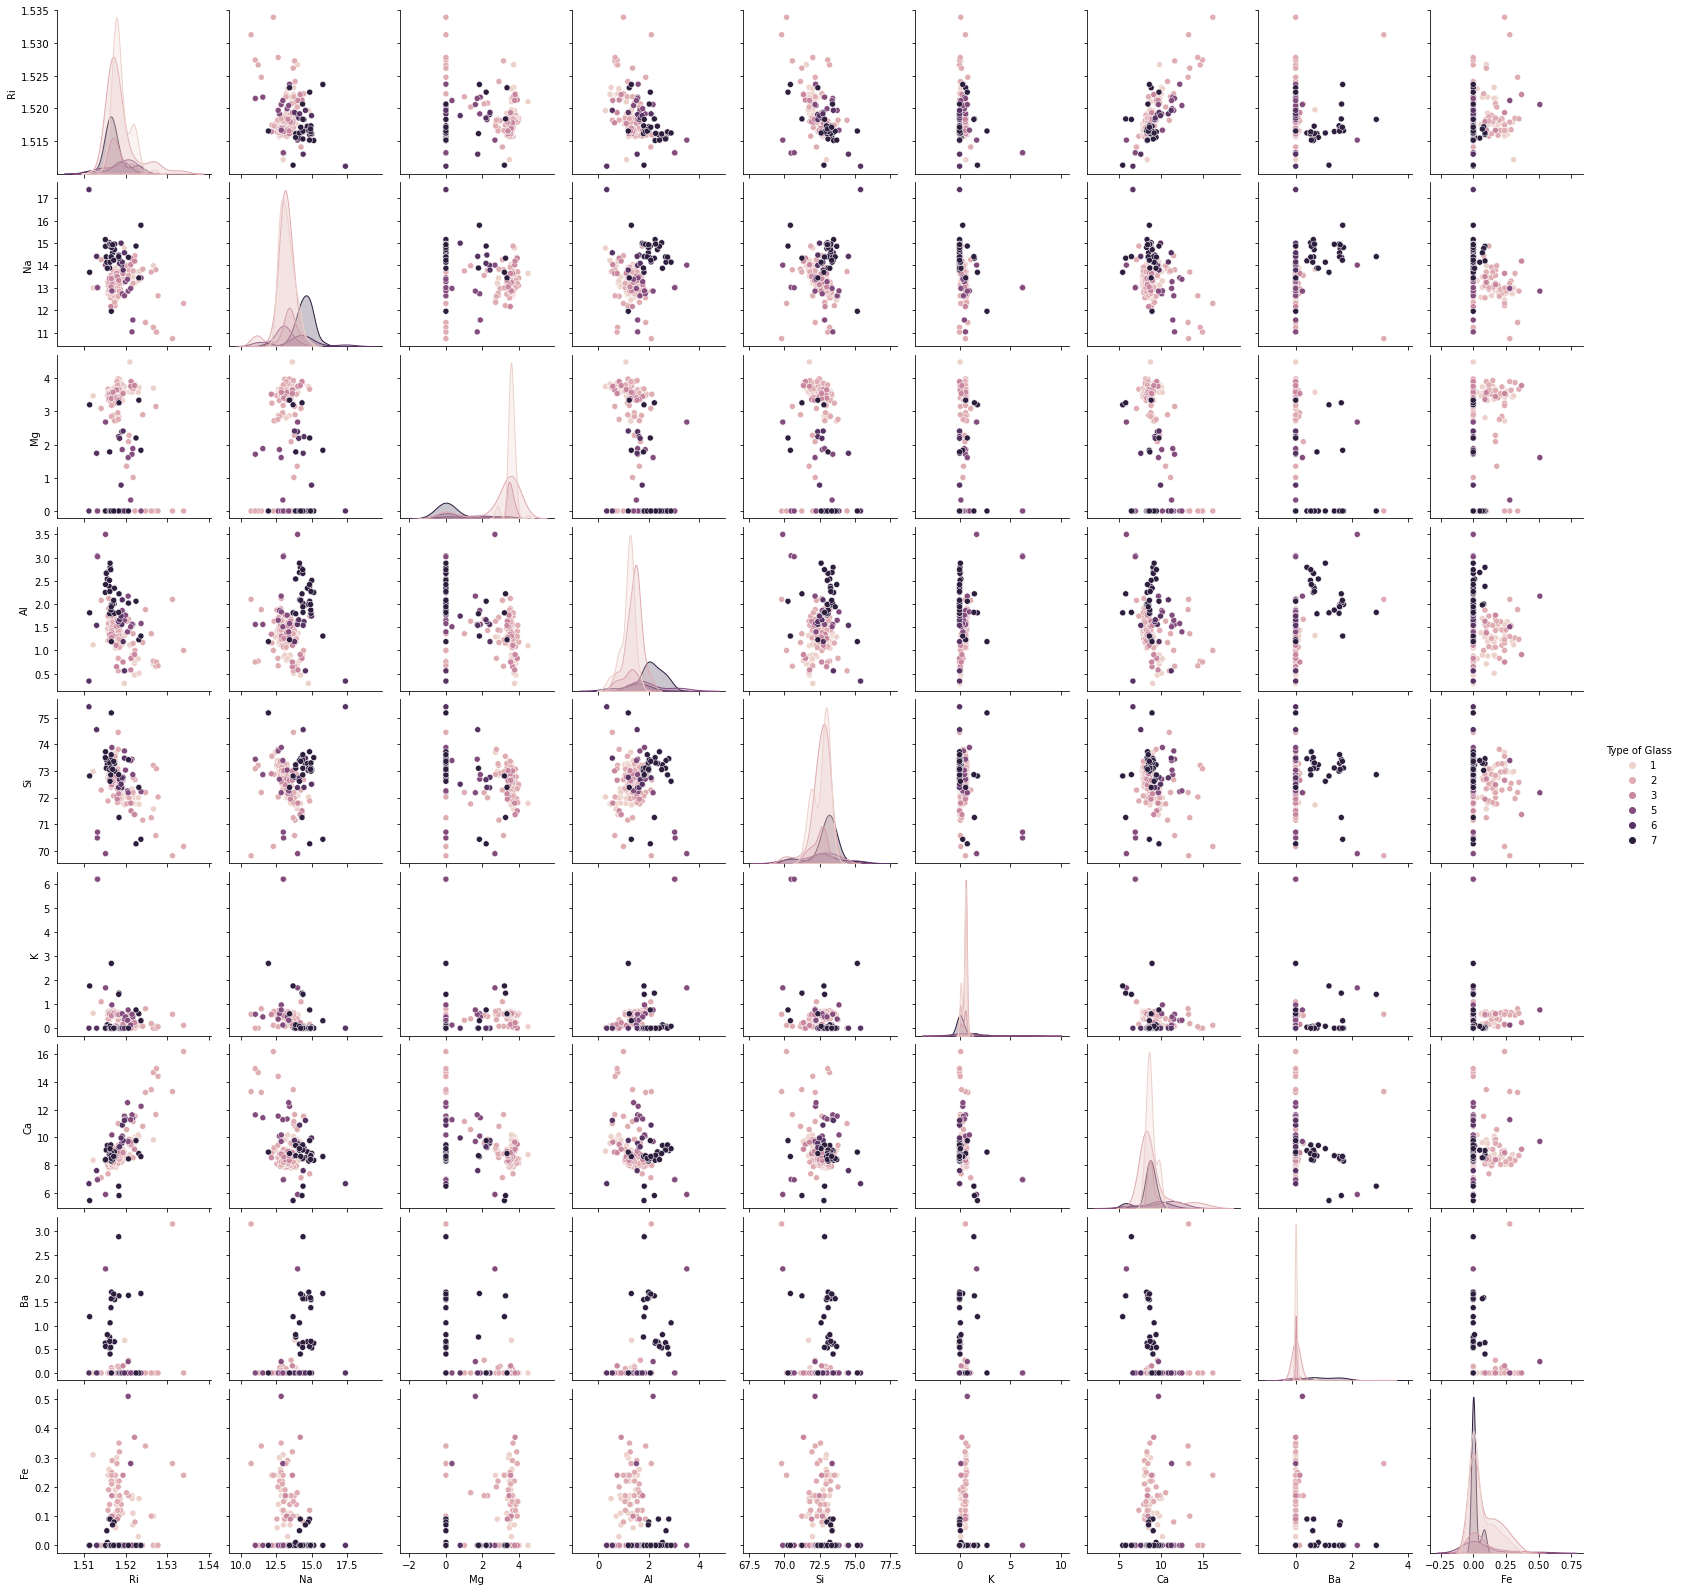

In [27]:
sns.pairplot(df, hue="Type of Glass")

Ri                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
Na               AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Mg                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Al               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Si               AxesSubplot(0.766379,0.536818;0.133621x0.343182)
K                      AxesSubplot(0.125,0.125;0.133621x0.343182)
Ca                  AxesSubplot(0.285345,0.125;0.133621x0.343182)
Ba                   AxesSubplot(0.44569,0.125;0.133621x0.343182)
Fe                  AxesSubplot(0.606034,0.125;0.133621x0.343182)
Type of Glass       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

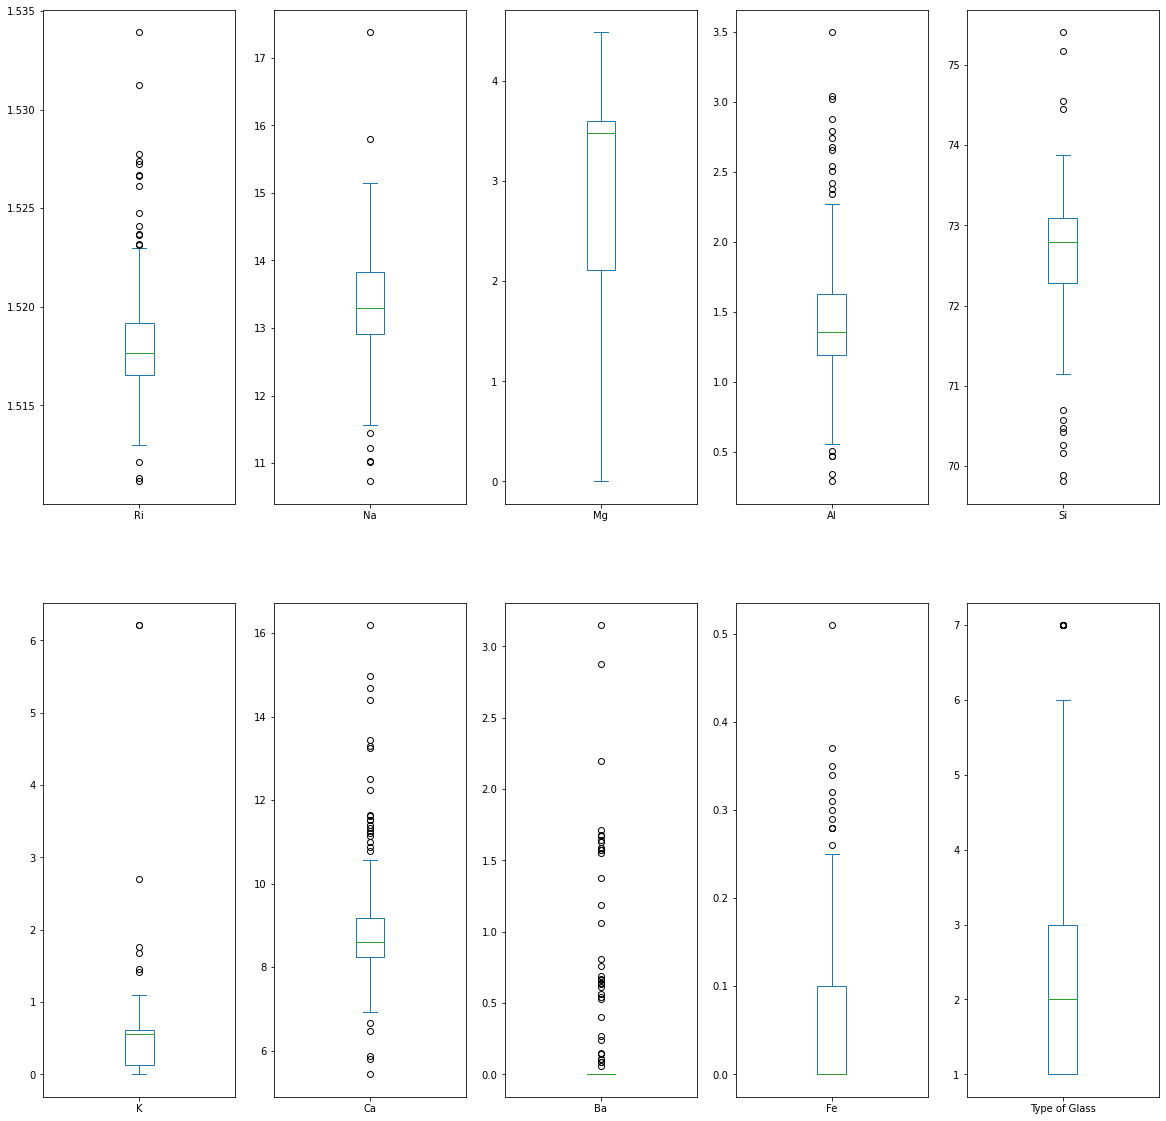

In [28]:
df.plot(kind='box',subplots=True, layout=(2,5),figsize=(20,20))

In [29]:
df.corr()  

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
Ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of Glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [30]:
df.corr()['Type of Glass'].sort_values()

Mg              -0.744993
Fe              -0.188278
Ri              -0.164237
K               -0.010054
Ca               0.000952
Si               0.151565
Na               0.502898
Ba               0.575161
Al               0.598829
Type of Glass    1.000000
Name: Type of Glass, dtype: float64

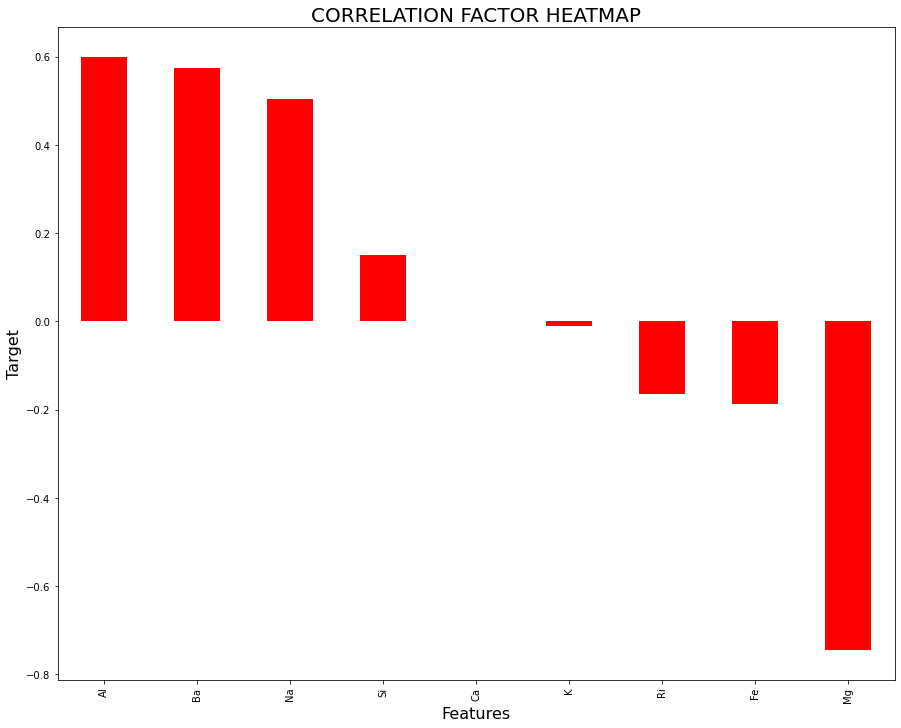

In [31]:
plt.figure(figsize=(15,12))                
df.corr()['Type of Glass'].sort_values(ascending=False).drop(['Type of Glass']).plot(kind='bar',color='red')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('CORRELATION FACTOR HEATMAP',fontsize=20)
plt.show()

In [32]:
df.drop('Ba',axis=1,inplace=True)     
df.drop('Fe',axis=1,inplace=True)

In [33]:
df.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,7.000000


In [34]:
#checking for skewness 
df.skew()     

Ri               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Type of Glass    1.114915
dtype: float64

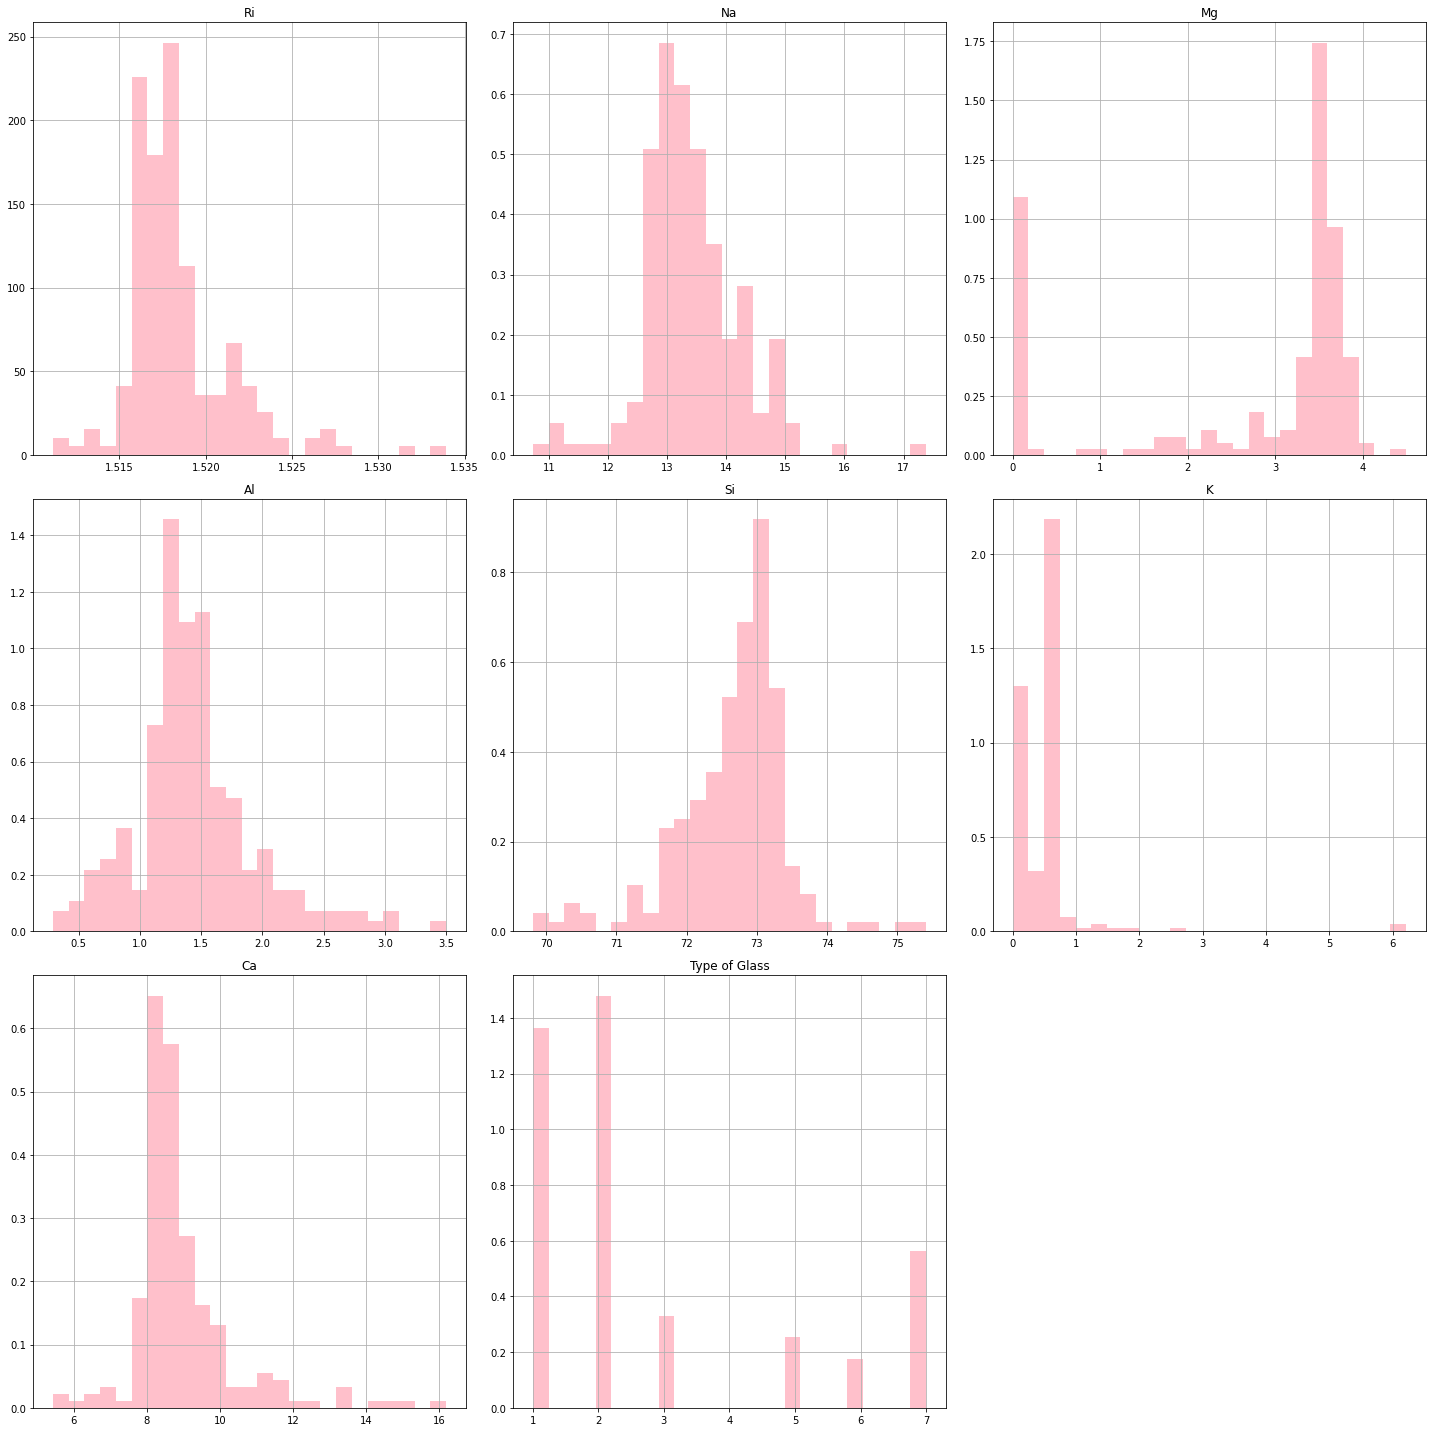

In [35]:
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='pink',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

In [36]:
#Removing the outliers
Features=df[['Ri','Na','Al','Si','K','Ca']]       
z=np.abs(zscore(Features))
z

,Ri,Na,Al,Si,K,Ca
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699
...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931


In [37]:
#new dataframe
new_df=df[(z<3).all(axis=1)]
new_df               

,Ri,Na,Mg,Al,Si,K,Ca,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [38]:
new_df.shape     

(201, 8)

In [39]:
df.shape

(214, 8)

In [40]:
lostdata=((df.shape[0] - new_df.shape[0])/df.shape[0])*100 
print(" percentage of lost data is:-", lostdata)

 percentage of lost data is:- 6.074766355140187


In [41]:
#IQR METHOD
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
QQ=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [42]:
print("Old  data in Rows and Column:",df.shape)
print("\nNew  data in Rows and Column:",QQ.shape)
print("\nTotal Dropped rows:",df.shape[0]-QQ.shape[0])

Old  data in Rows and Column: (214, 8)

New  data in Rows and Column: (153, 8)

Total Dropped rows: 61


Ri                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
Na               AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Mg                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Al               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Si               AxesSubplot(0.766379,0.536818;0.133621x0.343182)
K                      AxesSubplot(0.125,0.125;0.133621x0.343182)
Ca                  AxesSubplot(0.285345,0.125;0.133621x0.343182)
Type of Glass        AxesSubplot(0.44569,0.125;0.133621x0.343182)
dtype: object

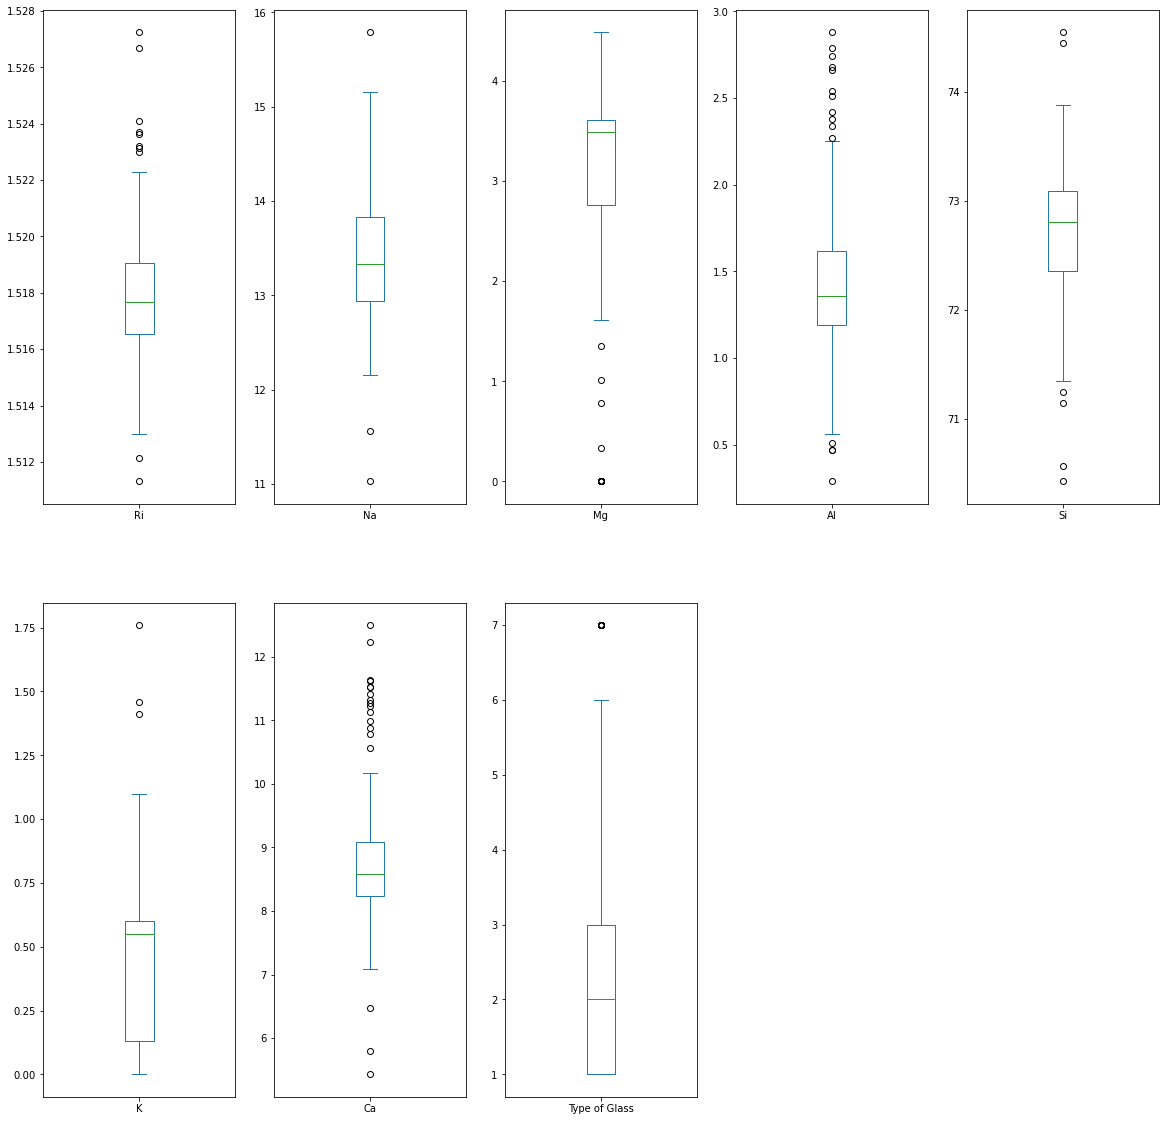

In [43]:
new_df.plot(kind='box',subplots=True, layout=(2,5),figsize=(20,20))

In [44]:
pt=PowerTransformer(method='yeo-johnson')

In [45]:
new_df[['Ri','Na','Mg','Al','Si','K','Ca']]=pt.fit_transform(new_df[['Ri','Na','Mg','Al','Si','K','Ca']].values)

In [46]:
pp=['Ri','Na','Mg','Al','Si','K','Ca']

In [47]:
new_df.skew()

Ri               0.000000
Na              -0.026383
Mg              -0.989652
Al               0.013277
Si               0.056350
K                0.005150
Ca              -0.062276
Type of Glass    1.180372
dtype: float64

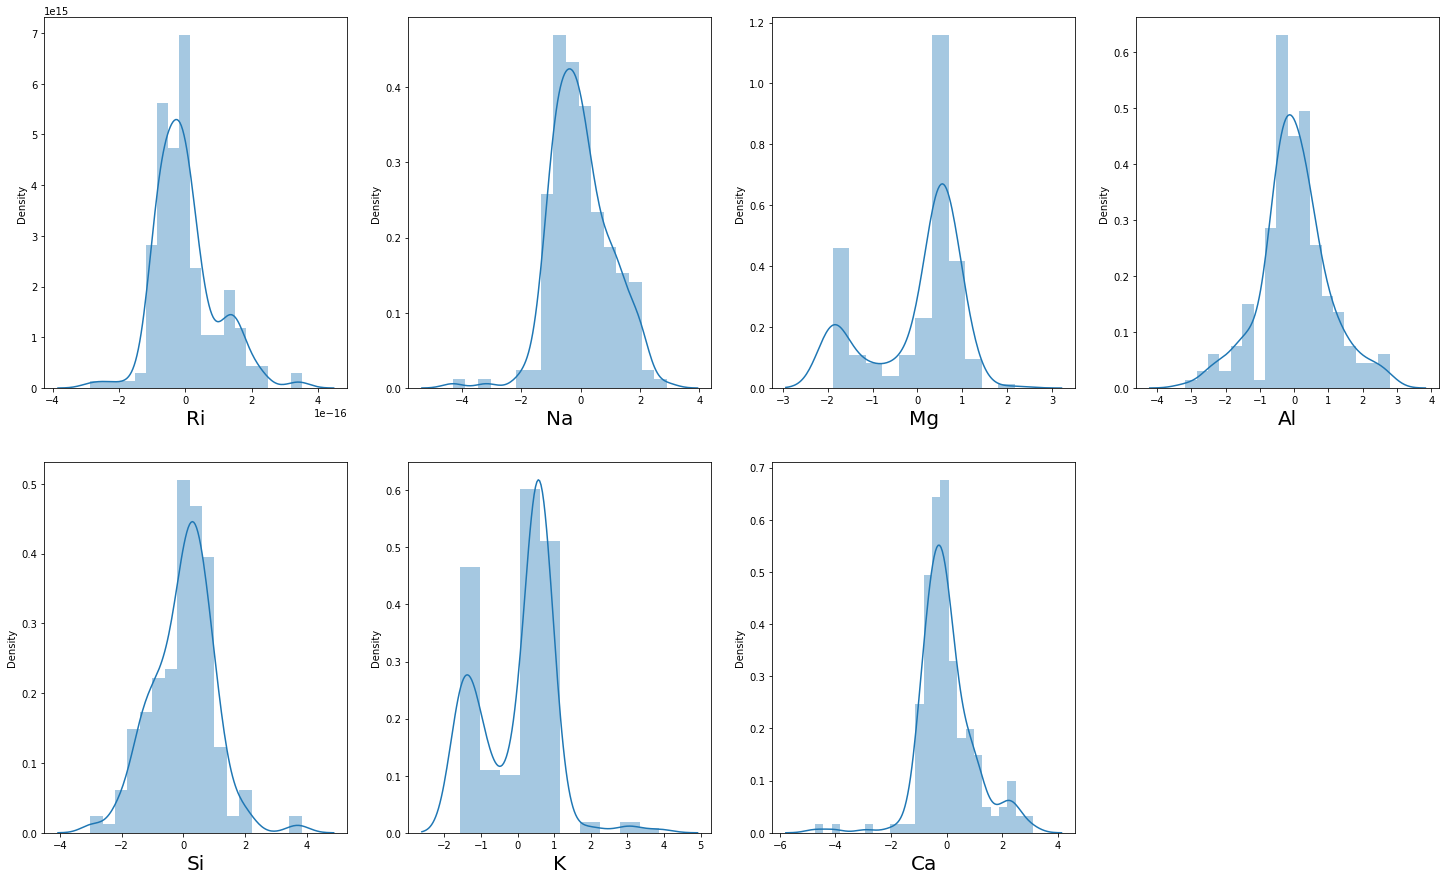

In [48]:
plt.figure(figsize=(25,15))
plotnumber=1
for column in new_df[pp]:
    if plotnumber<=9:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [49]:
new_df.head()

,Ri,Na,Mg,Al,Si,K,Ca,Type of Glass
0,1.179612e-16,0.339501,2.169617,-0.720906,-1.470991,-1.329665,0.007840,1
1,-1.734723e-17,0.683061,0.607744,-0.091440,-0.030142,0.210816,-1.035673,1
2,-7.979728e-17,0.183789,0.533625,0.313703,0.424954,-0.098767,-1.097042,1
3,-1.734723e-17,-0.285846,0.744670,-0.255436,-0.230825,0.511153,-0.574259,1
4,-2.775558e-17,-0.195845,0.637781,-0.374956,0.589187,0.445168,-0.748200,1


In [50]:
x=new_df.loc [:,new_df.columns != 'Type of Glass']

In [51]:
y=new_df.loc[:,'Type of Glass']

In [52]:
x

,Ri,Na,Mg,Al,Si,K,Ca
0,1.179612e-16,0.339501,2.169617,-0.720906,-1.470991,-1.329665,0.007840
1,-1.734723e-17,0.683061,0.607744,-0.091440,-0.030142,0.210816,-1.035673
2,-7.979728e-17,0.183789,0.533625,0.313703,0.424954,-0.098767,-1.097042
3,-1.734723e-17,-0.285846,0.744670,-0.255436,-0.230825,0.511153,-0.574259
4,-2.775558e-17,-0.195845,0.637781,-0.374956,0.589187,0.445168,-0.748200
...,...,...,...,...,...,...,...
209,-7.632783e-17,1.012933,-1.891584,2.787367,-0.230825,-1.250044,0.446308
210,-4.857226e-17,1.962165,-1.891584,1.237607,0.552386,-1.573130,-0.371051
211,1.006140e-16,1.292500,-1.891584,1.295290,1.242370,-1.573130,-0.326685
212,-6.591949e-17,1.317436,-1.891584,1.140470,1.631011,-1.573130,-0.282600


In [53]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of Glass, Length: 201, dtype: int64

In [54]:
x.shape, y.shape

((201, 7), (201,))

In [55]:
scaled=StandardScaler()
x=pd.DataFrame(scaled.fit_transform(x),columns=x.columns)
x


,Ri,Na,Mg,Al,Si,K,Ca
0,1.276094,0.339501,2.169617,-0.720906,-1.470991,-1.329665,0.007840
1,-0.187233,0.683061,0.607744,-0.091440,-0.030142,0.210816,-1.035673
2,-0.862614,0.183789,0.533625,0.313703,0.424954,-0.098767,-1.097042
3,-0.187233,-0.285846,0.744670,-0.255436,-0.230825,0.511153,-0.574259
4,-0.299796,-0.195845,0.637781,-0.374956,0.589187,0.445168,-0.748200
...,...,...,...,...,...,...,...
196,-0.825093,1.012933,-1.891584,2.787367,-0.230825,-1.250044,0.446308
197,-0.524923,1.962165,-1.891584,1.237607,0.552386,-1.573130,-0.371051
198,1.088488,1.292500,-1.891584,1.295290,1.242370,-1.573130,-0.326685
199,-0.712529,1.317436,-1.891584,1.140470,1.631011,-1.573130,-0.282600


In [56]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [57]:
vif_cal()

   VIF FACTOR FEATURES
0    4.406308       Ri
1    6.468622       Na
2    8.363145       Mg
3    3.969032       Al
4    5.018795       Si
5    4.389737        K
6    6.854219       Ca


In [58]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE


In [59]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [60]:
x.shape

(420, 7)

In [61]:
y.shape

(420,)

<AxesSubplot:xlabel='Type of Glass', ylabel='count'>

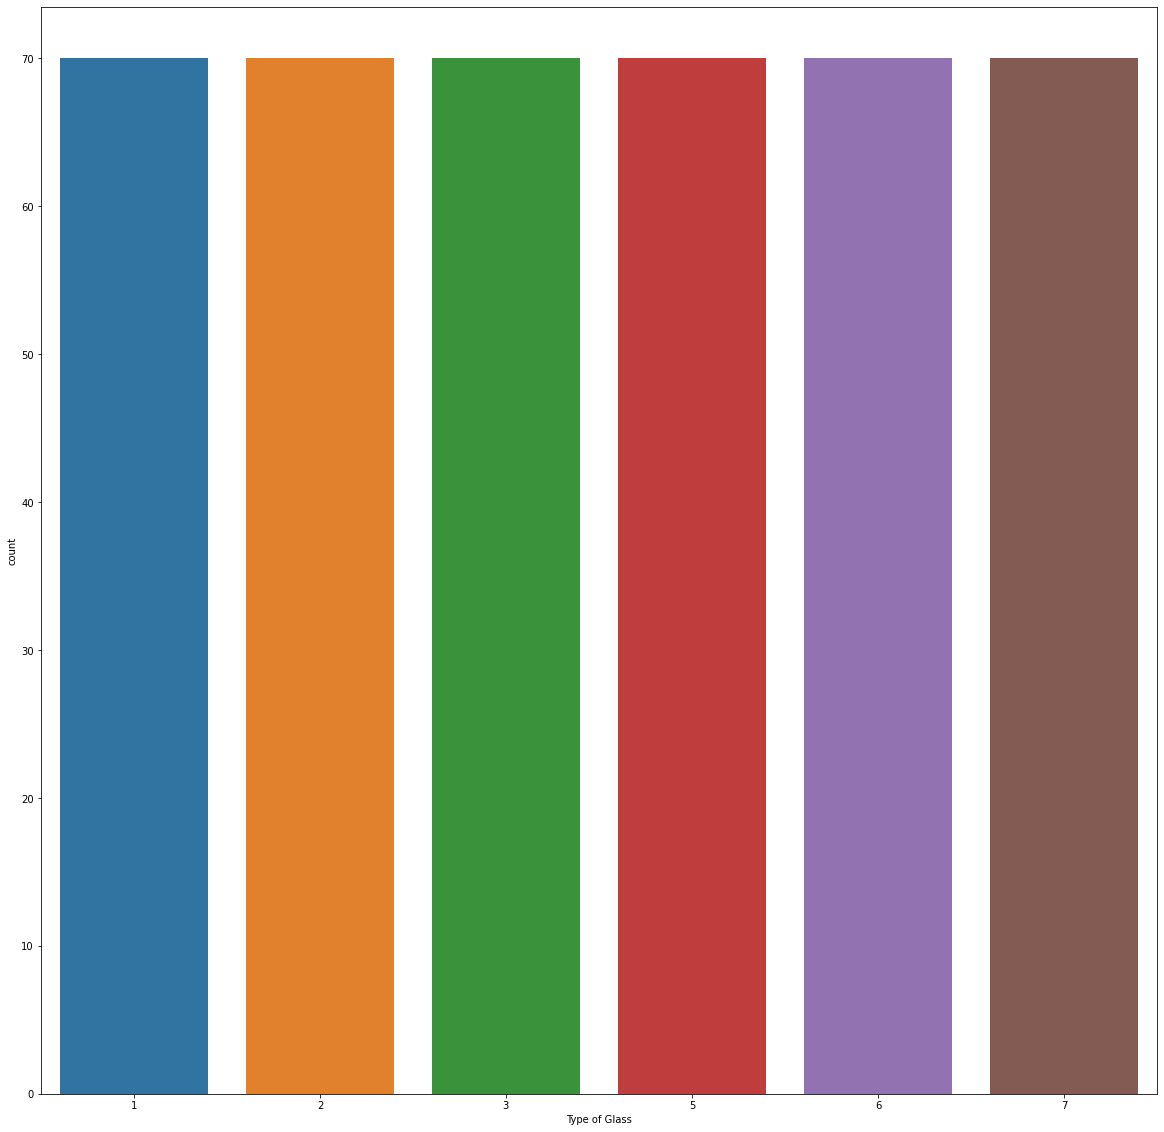

In [62]:
sns.countplot(y)

# LOGISTIC REGRESSION MODEL

In [63]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=64)

In [65]:
lr.fit(x_train,y_train)

LogisticRegression()

In [66]:
pred_test=lr.predict(x_test)
accuracy_score(y_test,pred_test)

0.8333333333333334

In [67]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.64      0.69      0.67        13
           2       0.61      0.73      0.67        15
           3       0.88      0.74      0.80        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        13
           7       1.00      0.89      0.94         9

    accuracy                           0.83        84
   macro avg       0.85      0.84      0.85        84
weighted avg       0.85      0.83      0.84        84



In [68]:
pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)

In [69]:
for i in range(2,8):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 2
Cross validation score is :- 75.0
Accuracy_score is :- 83.33333333333334


At cv:- 3
Cross validation score is :- 79.04761904761905
Accuracy_score is :- 83.33333333333334


At cv:- 4
Cross validation score is :- 79.04761904761905
Accuracy_score is :- 83.33333333333334


At cv:- 5
Cross validation score is :- 79.52380952380953
Accuracy_score is :- 83.33333333333334


At cv:- 6
Cross validation score is :- 78.0952380952381
Accuracy_score is :- 83.33333333333334


At cv:- 7
Cross validation score is :- 78.80952380952381
Accuracy_score is :- 83.33333333333334




In [70]:
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss) 

The cv score is :-  0.7952380952380953 
The accuracy_score is: 0.8333333333333334


In [71]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())

0.9404761904761905
[[11  1  1  0  0  0]
 [ 0 14  0  1  0  0]
 [ 1  0 18  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 13  0]
 [ 0  1  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       0.88      0.93      0.90        15
           3       0.95      0.95      0.95        19
           5       0.94      1.00      0.97        15
           6       1.00      1.00      1.00        13
           7       1.00      0.89      0.94         9

    accuracy                           0.94        84
   macro avg       0.95      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84

CV  :- 0.8595238095238095


In [72]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())

0.8452380952380952
[[ 7  3  2  0  0  1]
 [ 1 12  1  1  0  0]
 [ 0  2 17  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 12  1]
 [ 0  1  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.88      0.54      0.67        13
           2       0.67      0.80      0.73        15
           3       0.85      0.89      0.87        19
           5       0.94      1.00      0.97        15
           6       1.00      0.92      0.96        13
           7       0.80      0.89      0.84         9

    accuracy                           0.85        84
   macro avg       0.85      0.84      0.84        84
weighted avg       0.85      0.85      0.84        84

CV  :- 0.8142857142857143


In [73]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)
print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))
print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())

0.9523809523809523
[[11  1  1  0  0  0]
 [ 0 15  0  0  0  0]
 [ 1  0 18  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 13  0]
 [ 0  1  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       0.88      1.00      0.94        15
           3       0.95      0.95      0.95        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        13
           7       1.00      0.89      0.94         9

    accuracy                           0.95        84
   macro avg       0.96      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84

CV  :- 0.8309523809523809


In [74]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())

0.8452380952380952
[[ 9  2  2  0  0  0]
 [ 3 10  1  1  0  0]
 [ 1  0 18  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 12  1]
 [ 0  1  0  0  1  7]]
              precision    recall  f1-score   support

           1       0.69      0.69      0.69        13
           2       0.77      0.67      0.71        15
           3       0.86      0.95      0.90        19
           5       0.94      1.00      0.97        15
           6       0.92      0.92      0.92        13
           7       0.88      0.78      0.82         9

    accuracy                           0.85        84
   macro avg       0.84      0.83      0.84        84
weighted avg       0.84      0.85      0.84        84

CV  :- 0.8452380952380952


In [75]:
Z=pd.DataFrame([["LR"," 83.3%"],["Decision Tree Classifier","84%"],["KNeighbors Classifier","84.52%"],
                ["Random Forest Classifier","94%"],["Gradient Boosting","95.23%"]],
                    columns=["Model_Name","AccuracyScore"])
Z


,Model_Name,AccuracyScore
0,LR,83.3%
1,Decision Tree Classifier,84%
2,KNeighbors Classifier,84.52%
3,Random Forest Classifier,94%
4,Gradient Boosting,95.23%


In [76]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [77]:
parameters={'n_estimators' : [10, 50, 100],
              'max_depth' : [10, 20, 30],
              'learning_rate': [0.01,0.1,1,10,100]}

In [78]:
jj=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
jj.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [10, 50, 100]})

In [79]:
jj.best_params_

{'learning_rate': 10, 'max_depth': 20, 'n_estimators': 100}

In [80]:
gb=GradientBoostingClassifier(learning_rate=1,max_depth=10, n_estimators=100)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print('Accuracy =',accuracy_score(y_test,pred)*100)

Accuracy = 94.04761904761905


# SAVING THE MODEL USING PKL

In [81]:
joblib.dump(gb,"Glass.pkl")

['Glass.pkl']

In [83]:
kk=joblib.load("Glass.pkl")          
prediction=kk.predict(x_test)
prediction

array([1, 2, 6, 7, 6, 3, 1, 3, 6, 2, 2, 3, 6, 3, 3, 2, 6, 3, 5, 1, 5, 7,
       6, 2, 1, 3, 5, 7, 3, 7, 6, 3, 2, 3, 7, 6, 5, 1, 5, 7, 1, 5, 2, 2,
       6, 5, 3, 2, 3, 3, 1, 7, 7, 6, 7, 5, 5, 1, 5, 7, 5, 2, 3, 5, 3, 5,
       2, 2, 6, 3, 6, 3, 7, 2, 3, 1, 3, 1, 6, 5, 2, 3, 2, 5], dtype=int64)

In [84]:
pd.DataFrame([kk.predict(x_test)[:],y_test[:]],index=["predcited","original"])

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
predcited,1,2,6,7,6,3,1,3,6,2,...,3,1,3,1,6,5,2,3,2,5
original,1,2,6,7,6,3,1,3,6,2,...,1,1,3,1,6,5,2,3,2,5
